In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import os

# Input Preparation 

In [4]:
pd.options.mode.copy_on_write = True
BUST_TEST_COLUMNS = [
    # accuracy #
    "rmsd_≤_2å",
    # chemical validity and consistency #
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "molecular_formula",
    "molecular_bonds",
    "tetrahedral_chirality",
    "double_bond_stereochemistry",
    # intramolecular validity #
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "double_bond_flatness",
    "internal_energy",
    # intermolecular validity #
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
]

In [5]:
# Calculate the reduction in the number of molecules for each filter property
filter_columns = [
    'rmsd_≤_2å', 'mol_pred_loaded', 'mol_true_loaded', 'mol_cond_loaded',
    'sanitization', 'molecular_formula', 'molecular_bonds',
    'tetrahedral_chirality', 'double_bond_stereochemistry', 'bond_lengths',
    'bond_angles', 'internal_steric_clash', 'aromatic_ring_flatness',
    'double_bond_flatness', 'internal_energy',
    'minimum_distance_to_protein', 'minimum_distance_to_organic_cofactors',
    'minimum_distance_to_inorganic_cofactors', 'volume_overlap_with_protein',
    'volume_overlap_with_organic_cofactors', 'volume_overlap_with_inorganic_cofactors'
]

In [6]:
globals()['diffdock_output_dir']  = os.path.join("..", "forks", "DiffDock", "inference")
globals()["dynamicbind_output_dir"] = os.path.join(
    "..", "forks", "DynamicBind", "inference", "outputs", "results"
)

repeat_index = 1
max_num_repeats_per_method = 2

for repeat_index in range(0, max_num_repeats_per_method):
    globals()[f"diffdock_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()['diffdock_output_dir'], 
        f"diffdock_astex_diverse_output_{repeat_index}.csv", 
        "bust_results.csv")
    globals()[f"diffdock_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()['diffdock_output_dir'], 
        f"diffdock_posebusters_diverse_output_{repeat_index}.csv", 
        "bust_results.csv")
    globals()[f"dynamicbind_posebusters_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["dynamicbind_output_dir"],
        f"posebusters_benchmark_orig_structure_{repeat_index}",
        "bust_results.csv",
    )
    

## plotting function

In [8]:
def plot_pb_validity_hist(results_df, results_relaxed_df, title, save_path=None):
    # Assuming astex_diffdock_results_df and filter_columns are already defined
    molecules_passing_with_post_processing = [results_df[col].sum() for col in filter_columns]
    molecules_passing_without_post_processing = [results_relaxed_df[col].sum() for col in filter_columns]

    # Calculating proportions
    total_molecules = results_df.shape[0]
    proportions_with_post_processing = [value / total_molecules for value in molecules_passing_with_post_processing]
    proportions_without_post_processing = [value / total_molecules for value in molecules_passing_without_post_processing]

    # Plotting the reduction of molecules for each filter, comparing with and without post-processing
    plt.figure(figsize=(14, 10))
    bar_width = 0.35
    index = range(len(filter_columns))

    # Creating bar plots for each subset
    bars_with = plt.barh(index, molecules_passing_with_post_processing, bar_width, label='With Post-Processing', color='skyblue')
    bars_without = plt.barh([i + bar_width for i in index], molecules_passing_without_post_processing, bar_width, label='Without Post-Processing', color='lightgreen')

    # Adding labels and title
    plt.xlabel('Number of Molecules')
    plt.ylabel('Filter Property')
    plt.title(f'{title} Number of Molecules by Each Filter Property (With vs. Without Post-Processing)')
    plt.yticks([i + bar_width / 2 for i in index], filter_columns)
    plt.gca().invert_yaxis()  # To have the first filter at the top
    plt.legend()

    # Adding proportional annotations to the bars
    for bar, proportion in zip(bars_with, proportions_with_post_processing):
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
                f'{proportion:.1%}', va='center', fontsize=9, color='black')

    for bar, proportion in zip(bars_without, proportions_without_post_processing):
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
                f'{proportion:.1%}', va='center', fontsize=9, color='black')

    # Display the plot
    plt.show()

# Results

## astex

In [16]:
astex_diffdock_bust_results_csv_filepath_ = os.path.join(globals()["diffdock_output_dir"], "diffdock_astex_diverse_output_orig_structure_1", "bust_results.csv")
# dynamicbind_astex_bust_results_csv_filepath_ = os.path.join(globals()["dynamicbind_output_dir"], "bust_results.csv")
astex_diffdock_results_df = pd.read_csv(astex_diffdock_bust_results_csv_filepath_)

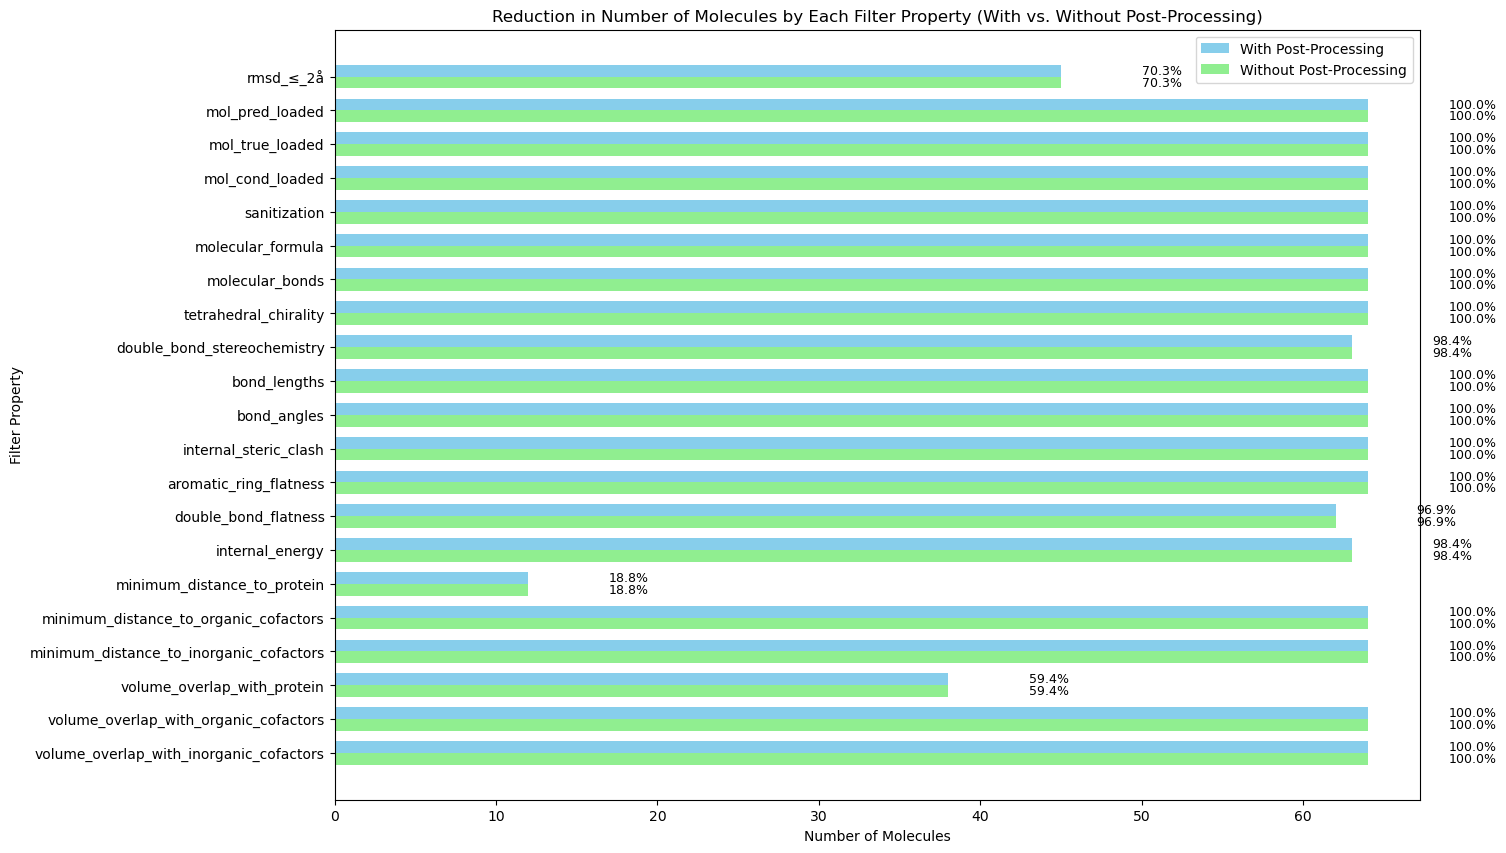

In [17]:
# Assuming astex_diffdock_results_df and filter_columns are already defined
molecules_passing_with_post_processing = [astex_diffdock_results_df[col].sum() for col in filter_columns]
molecules_passing_without_post_processing = [astex_diffdock_results_df[col].sum() for col in filter_columns]

# Calculating proportions
total_molecules = astex_diffdock_results_df.shape[0]
proportions_with_post_processing = [value / total_molecules for value in molecules_passing_with_post_processing]
proportions_without_post_processing = [value / total_molecules for value in molecules_passing_without_post_processing]

# Plotting the reduction of molecules for each filter, comparing with and without post-processing
plt.figure(figsize=(14, 10))
bar_width = 0.35
index = range(len(filter_columns))

# Creating bar plots for each subset
bars_with = plt.barh(index, molecules_passing_with_post_processing, bar_width, label='With Post-Processing', color='skyblue')
bars_without = plt.barh([i + bar_width for i in index], molecules_passing_without_post_processing, bar_width, label='Without Post-Processing', color='lightgreen')

# Adding labels and title
plt.xlabel('Number of Molecules')
plt.ylabel('Filter Property')
plt.title('Reduction in Number of Molecules by Each Filter Property (With vs. Without Post-Processing)')
plt.yticks([i + bar_width / 2 for i in index], filter_columns)
plt.gca().invert_yaxis()  # To have the first filter at the top
plt.legend()

# Adding proportional annotations to the bars
for bar, proportion in zip(bars_with, proportions_with_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

for bar, proportion in zip(bars_without, proportions_without_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

# Display the plot
plt.show()

## Posebuster

In [15]:
pb_diffdock_bust_results_csv_filepath_ = os.path.join(globals()["diffdock_output_dir"], "diffdock_posebusters_benchmark_output_orig_structure_2", "bust_results.csv")
pd_diffdock_bust_relaxed_results_csv_filepath_ = os.path.join(globals()["diffdock_output_dir"], "diffdock_posebusters_benchmark_output_orig_structure_2_relaxed", "bust_results.csv") 
# dynamicbind_astex_bust_results_csv_filepath_ = os.path.join(globals()["dynamicbind_output_dir"], "bust_results.csv")
pb_diffdock_results_df = pd.read_csv(pb_diffdock_bust_results_csv_filepath_)
pb_diffdock_results_df.loc[:, "pose-processsing"] = False
pb_diffdock_results_relaxed_df = pd.read_csv(pd_diffdock_bust_relaxed_results_csv_filepath_)
pb_diffdock_results_relaxed_df.loc[:, "pose-processsing"] = True
pb_diffdock_results_combined_df = pd.concat([pb_diffdock_results_df, pb_diffdock_results_relaxed_df])

In [16]:
# Comparing the two DataFrames element-wise and creating a DataFrame of booleans
comparison_df = pb_diffdock_results_df == pb_diffdock_results_relaxed_df

# Counting the number of False entries in the comparison DataFrame
false_count = (~comparison_df).sum().sum()

# Printing the count of False entries
print(f'Number of False entries: {false_count}')

Number of False entries: 12082


In [17]:
print(pb_diffdock_results_df.loc[:, "rmsd_≤_2å"].value_counts())
print(pb_diffdock_results_relaxed_df.loc[:, "rmsd_≤_2å"].value_counts())

False    121
True      94
Name: rmsd_≤_2å, dtype: int64
False    132
True      83
Name: rmsd_≤_2å, dtype: int64


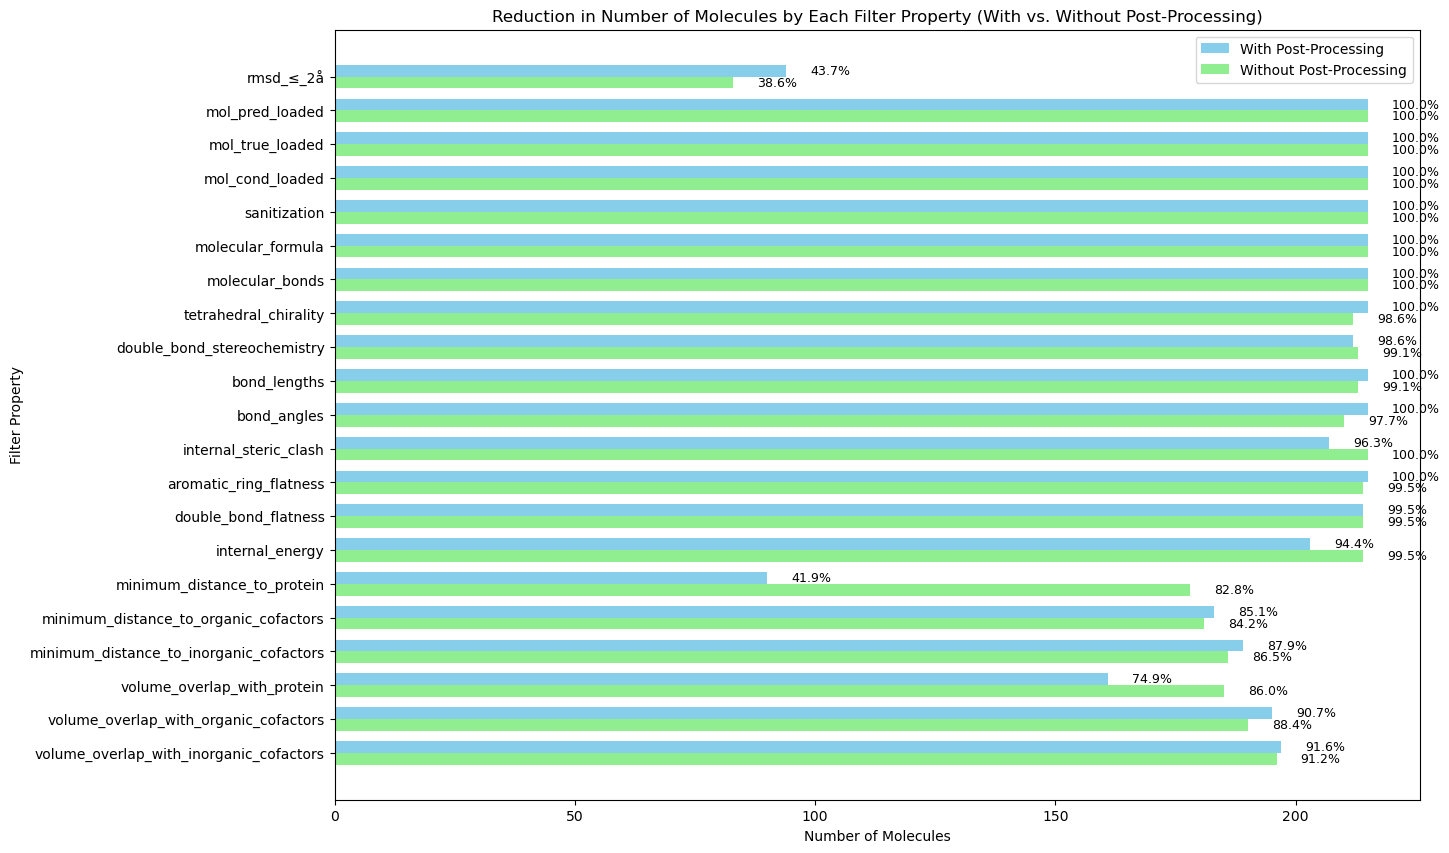

In [19]:
# Assuming astex_diffdock_results_df and filter_columns are already defined
molecules_passing_with_post_processing = [pb_diffdock_results_df[col].sum() for col in filter_columns]
molecules_passing_without_post_processing = [pb_diffdock_results_relaxed_df[col].sum() for col in filter_columns]

# Calculating proportions
total_molecules = pb_diffdock_results_df.shape[0]
proportions_with_post_processing = [value / total_molecules for value in molecules_passing_with_post_processing]
proportions_without_post_processing = [value / total_molecules for value in molecules_passing_without_post_processing]

# Plotting the reduction of molecules for each filter, comparing with and without post-processing
plt.figure(figsize=(14, 10))
bar_width = 0.35
index = range(len(filter_columns))

# Creating bar plots for each subset
bars_with = plt.barh(index, molecules_passing_with_post_processing, bar_width, label='With Post-Processing', color='skyblue')
bars_without = plt.barh([i + bar_width for i in index], molecules_passing_without_post_processing, bar_width, label='Without Post-Processing', color='lightgreen')

# Adding labels and title
plt.xlabel('Number of Molecules')
plt.ylabel('Filter Property')
plt.title('Reduction in Number of Molecules by Each Filter Property (With vs. Without Post-Processing)')
plt.yticks([i + bar_width / 2 for i in index], filter_columns)
plt.gca().invert_yaxis()  # To have the first filter at the top
plt.legend()

# Adding proportional annotations to the bars
for bar, proportion in zip(bars_with, proportions_with_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

for bar, proportion in zip(bars_without, proportions_without_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

# Display the plot
plt.show()

### Diffdock-Vina

In [12]:
method = "vina_diffdock"
globals()["vina_diffdock_output"] = os.path.join("..", "forks", "Vina", "inference")
pb_vina_bust_results_csv_filepath_ = os.path.join(globals()["vina_diffdock_output"], f"{method}_posebusters_benchmark_outputs_orig_structure_1", "bust_results.csv")
pb_vina_bust_results_relaxed_csv_filepath_ = os.path.join(globals()["vina_diffdock_output"], f"{method}_posebusters_benchmark_outputs_orig_structure_1_relaxed", "bust_results.csv")
pb_vina_results_df = pd.read_csv(pb_vina_bust_results_csv_filepath_)
pb_vina_results_df
pb_vina_results_relaxed_df = pd.read_csv(pb_vina_bust_results_relaxed_csv_filepath_)
pb_vina_results_relaxed_df

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.001670,NaN,NaN,NaN,21.626044,0.173818,21.543115
1,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,0.035831,NaN,NaN,NaN,5.105825,1.443197,0.855002
2,True,True,True,True,True,True,True,True,True,False,...,NaN,NaN,NaN,0.093502,NaN,NaN,NaN,14.463286,4.496247,13.221066
3,True,True,True,True,True,True,True,True,True,True,...,3.15,0.140305,True,0.221071,0.208190,0.141371,0.141371,5.127580,0.678441,2.006277
4,True,True,True,True,True,True,True,True,True,True,...,3.25,0.096167,True,0.251667,0.217875,0.163432,0.163432,35.683850,1.129304,35.529047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.005660,NaN,NaN,NaN,51.629589,1.459652,50.864625
203,True,True,True,True,True,True,True,True,True,True,...,3.40,0.089129,True,0.150925,0.143835,0.103959,0.103959,6.533492,0.547599,2.979456
204,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.017051,NaN,NaN,NaN,5.840823,0.946949,1.132069
205,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.007741,NaN,NaN,NaN,1.004734,0.843683,0.229689


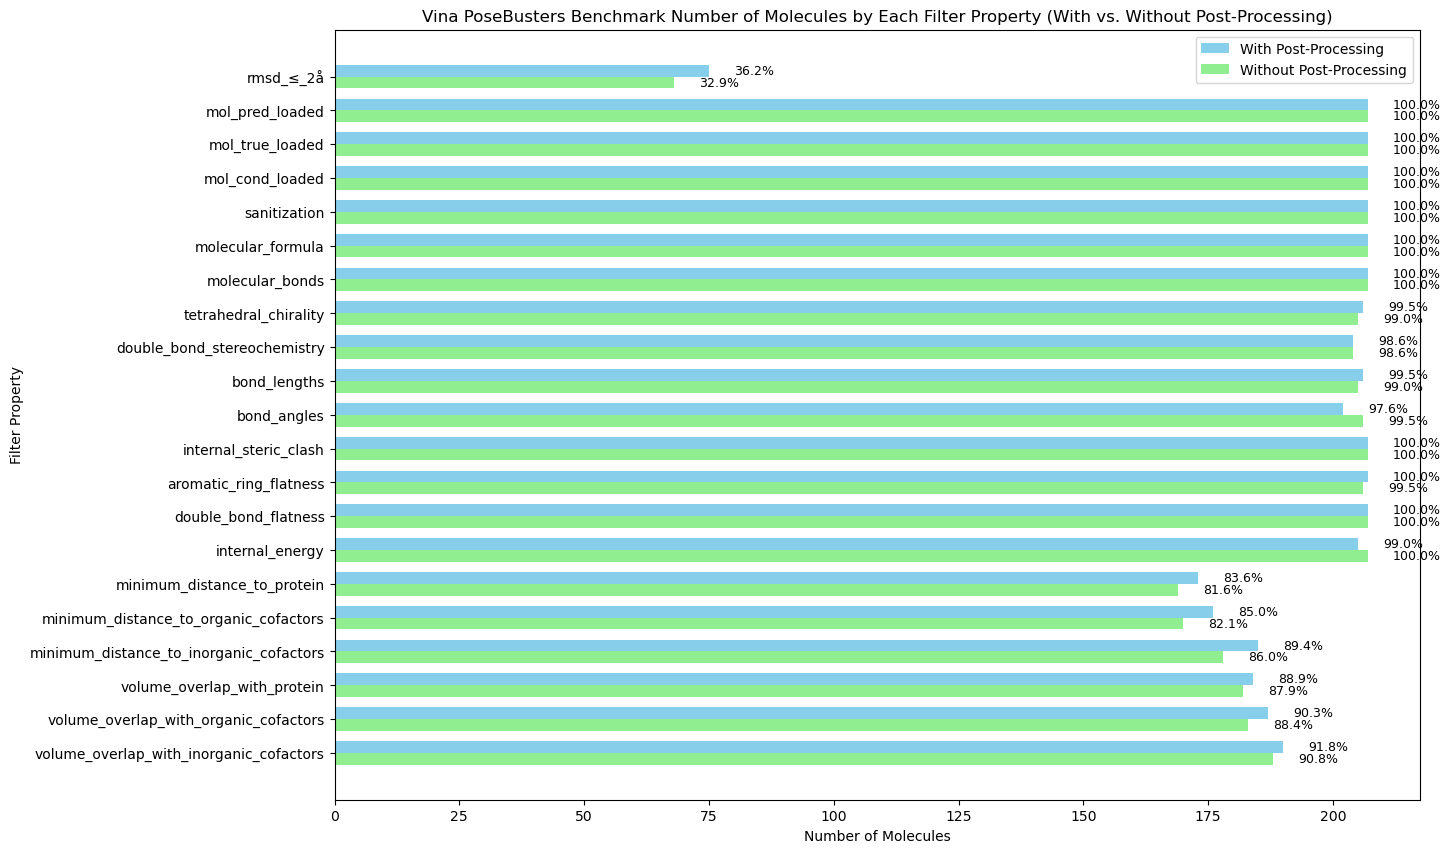

In [15]:
plot_pb_validity_hist(pb_vina_results_df, pb_vina_results_relaxed_df, "Vina PoseBusters Benchmark", save_path=None)

### Dynamicbind 

In [10]:
method = "gnina_diffdock"
globals()["gnina_diffdock_output"] = os.path.join("..", "forks", "gnina", "inference")
pb_gnina_bust_results_csv_filepath_ = os.path.join(globals()["gnina_diffdock_output"], f"{method}_posebusters_benchmark_outputs_orig_structure_1", "bust_results.csv")
pb_gnina_bust_results_relaxed_csv_filepath_ = os.path.join(globals()["gnina_diffdock_output"], f"{method}_posebusters_benchmark_outputs_orig_structure_1_relaxed", "bust_results.csv")
pb_gnina_results_df = pd.read_csv(pb_gnina_bust_results_csv_filepath_)
pb_gnina_results_relaxed_df = pd.read_csv(pb_gnina_bust_results_relaxed_csv_filepath_)
pb_gnina_results_relaxed_df

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.008954,NaN,NaN,NaN,32.416508,0.721063,32.347449
1,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.004901,NaN,NaN,NaN,0.404355,0.185860,0.315839
2,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.000844,NaN,NaN,NaN,21.265961,3.065240,19.966865
3,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.057124,0.824237,82.866010
4,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.120587,1.244888,56.088384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.003180,NaN,NaN,NaN,30.496483,2.253711,28.132647
61,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.043927,0.611949,51.886459
62,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.139113,0.602247,64.017200
63,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.001810,NaN,NaN,NaN,16.355812,2.019323,14.673048


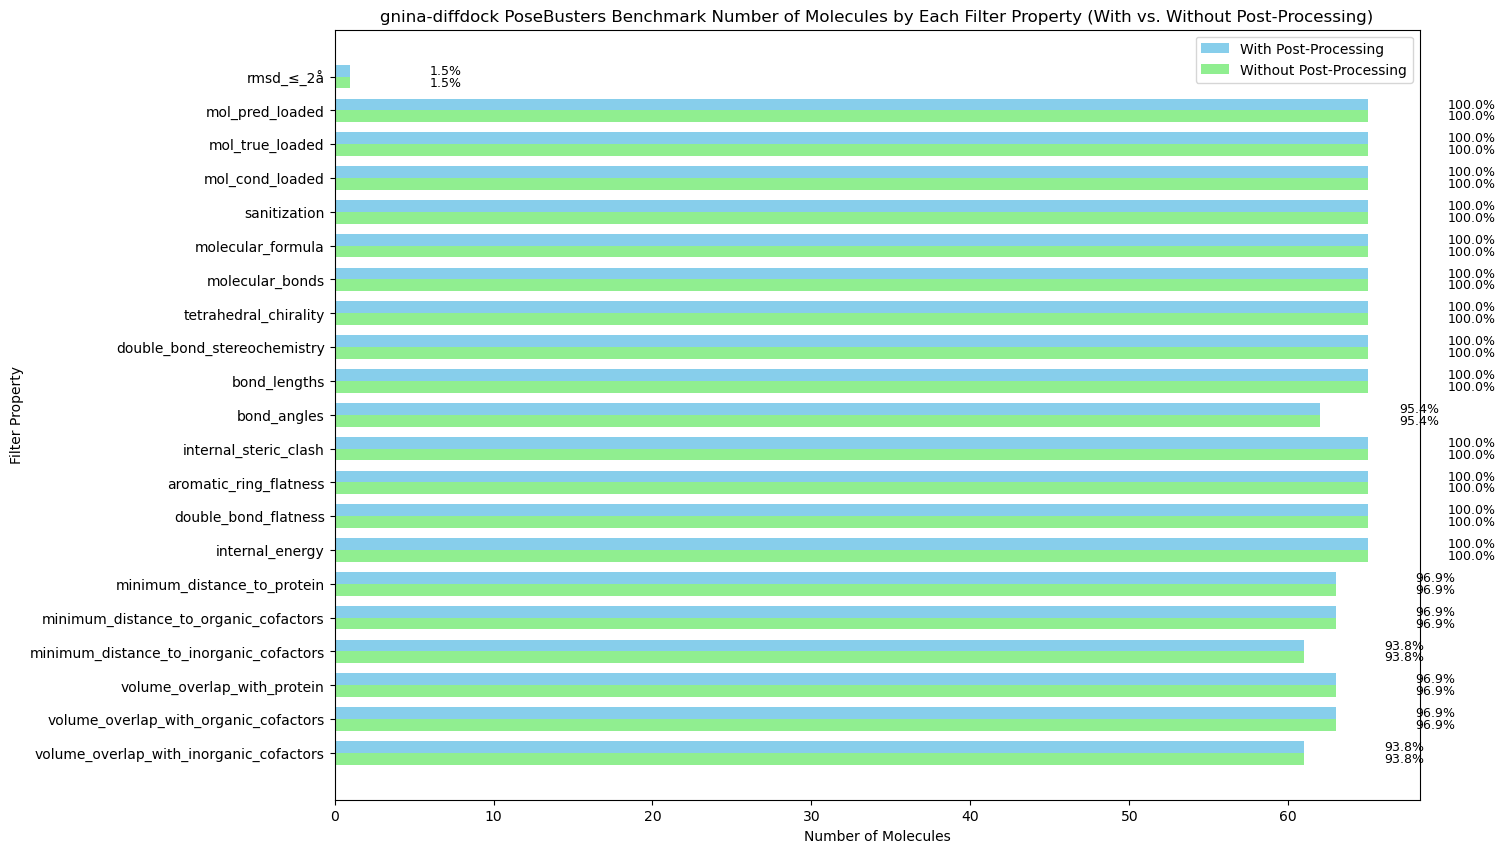

In [11]:
plot_pb_validity_hist(pb_gnina_results_df, pb_gnina_results_relaxed_df, "gnina-diffdock PoseBusters Benchmark", save_path=None)

### gnina

In [ ]:
method = "gnina"
gnina_ = pd.read_csv(globals()[f"{method}_posebusters_bust_results_csv_filepath_{repeat_index}"])
dynamicbind_relaxed_results_df = pd.read_csv(os.path.join(globals()["dynamicbind_output_dir"], f"posebusters_benchmark_orig_structure_{repeat_index}_relaxed", "bust_results.csv"))
dynamicbind_results_df
dynamicbind_relaxed_results_df

In [ ]:
plot_pb_validity_hist(dynamicbind_results_df, "DynamicBind PoseBusters Benchmark", save_path=None)